In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

In [76]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [77]:
X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 0, 1)

In [78]:
X_norm = normalize(X)

X_pca = PCA(7).fit_transform(X_norm)

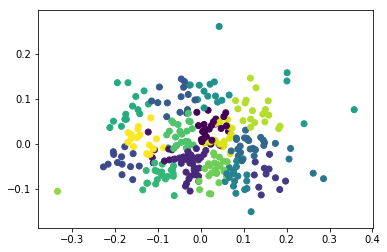

In [79]:
i = 0
results = []
for i in range(1,20):
    y_pred = KMeans(n_clusters=i, random_state=101).fit_predict(X_pca)
    results.append(accuracy_score(y, y_pred))
    i+=1
    
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [80]:
print(pd.crosstab(y_pred, y))

col_0   0   1
row_0        
0      12  12
1       3   5
2      13  21
3       2   9
4       9   4
5      10   4
6       8  14
7       0   4
8       1  18
9       8   6
10      2   2
11     13   1
12      6  14
13     17   7
14      6  19
15      0   1
16     10   8
17      7  10
18     12   5


In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

0.056105610561056105


In [74]:
print (results)

[0.45874587458745875, 0.6006600660066007, 0.36303630363036304, 0.3465346534653465, 0.3102310231023102, 0.1419141914191419, 0.23102310231023102, 0.13861386138613863, 0.13861386138613863, 0.033003300330033, 0.1254125412541254, 0.1188118811881188, 0.0594059405940594, 0.08250825082508251, 0.0462046204620462, 0.07920792079207921, 0.0594059405940594, 0.04950495049504951, 0.0858085808580858]
